In [1]:
import pandas as pd
import csv

data = pd.read_csv('employee_reviews.csv')
data.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [2]:
import warnings
warnings.filterwarnings('ignore')

data['status'],data['position'] = data['job-title'].str.split('-',n=1).str

data['position'].value_counts()[:50]

 Anonymous Employee                                 27002
 Software Engineer                                   1765
 Software Development Engineer                       1236
 Specialist                                          1060
 Program Manager                                      826
 Warehouse Associate                                  679
 Senior Software Engineer                             637
 Senior Program Manager                               608
 Fulfillment Associate                                602
 Software Development Engineer II                     586
 Manager                                              374
 Mac Specialist (Apple Store)                         355
 Senior Software Development Engineer                 322
 Area Manager                                         319
 Software Development Engineer In Test (SDET)         313
 Product Manager                                      304
 Family Room Specialist                               297
 Director     

In [3]:
data['is_current'] = 0
data['is_current'][data['position'].str.contains('Current')] = 1

data['Anonymous'] = 0
data['Anonymous'][data['position'].str.contains('Anonymous')] = 1

data['SDE'] = 0
data['SDE'][data['position'].str.contains('Software')] = 1

data['Product'] = 0
data['Product'][data['position'].str.contains('Product') | data['position'].str.contains('Program') | data['position'].str.contains('Project') ] = 1

data['Warehouse'] = 0
data['Warehouse'][data['position'].str.contains('Warehouse') | data['position'].str.contains('Process') | data['position'].str.contains('Stower') | data['position'].str.contains('Packer')] = 1

data['Operation'] = 0
data['Operation'][data['position'].str.contains('Fulfillment') | data['position'].str.contains('Area') | data['position'].str.contains('Operations')] = 1

data['Customer Service'] = 0
data['Customer Service'][data['position'].str.contains('Customer Service') | data['position'].str.contains('Family Room') | data['position'].str.contains('Picker') | data['position'].str.contains('Apple At Home')] = 1

data['Account'] = 0
data['Account'][data['position'].str.contains('Account') | data['position'].str.contains('Accountant') | data['position'].str.contains('Accounting')] = 1

data['Repair'] = 0
data['Repair'][data['position'].str.contains('Mac Specialist') | data['position'].str.contains('Genius') | data['position'].str.contains('Technical Specialist')] = 1

data['Recruiter'] = 0
data['Recruiter'][data['position'].str.contains('Recruiter')] = 1

data['Marketing'] = 0
data['Marketing'][data['position'].str.contains('Sales') | data['position'].str.contains('Seller') | data['position'].str.contains('Marketing')] = 1

data['Others'] = 0

data['Others'] = data['Others'][data['Anonymous'] == 0][data['SDE'] ==0][data['Product'] == 0][data['Warehouse'] == 0][data['Operation'] == 0][data['Customer Service'] == 0][data['Account'] == 0][data['Account'] == 0][data['Repair'] == 0][data['Repair'] == 0][data['Marketing'] == 0] = 1
#data[data['Others'] == 1]

In [4]:
data['Manager'] = 0
data['Manager'][data['position'].str.contains('Manager')] = 1

data['Specialist'] = 0
data['Specialist'][data['position'].str.contains('Specialist')] = 1
data['Specialist'][data['position'].str.contains('Genius')] = 1

data['Associate'] = 0
data['Associate'][data['position'].str.contains('Associate')] = 1

data['Director'] = 0
data['Director'][data['position'].str.contains('Director')] = 1

data['Expert'] = 0
data['Expert'][data['position'].str.contains('Expert')] = 1 #| data['position'].str.contains('III')] = 1

#data['Entry Level'] = 0
#data['Entry Level'] = data['Entry Level'][data['position'].str.contains('I')][data['position'].str.contains('II') == False][data['position'].str.contains('III') == False] = 1

data['Senior'] = 0
data['Senior'] = data['Senior'][data['position'].str.contains('Senior')] = 1 #| data['position'].str.contains('II')][data['position'].str.contains('III') == False] = 1

In [5]:
data = data.drop(['Unnamed: 0',  'job-title', 'link'], axis = 1)
data.head()

,company,location,dates,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,...,Repair,Recruiter,Marketing,Others,Manager,Specialist,Associate,Director,Expert,Senior
0,google,none,"Dec 11, 2018",Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,...,0,0,0,1,0,0,0,0,0,1
1,google,"Mountain View, CA","Jun 21, 2013","Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,...,0,0,0,1,1,0,0,0,0,1
2,google,"New York, NY","May 10, 2014",Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,...,0,0,0,1,0,0,0,0,0,1
3,google,"Mountain View, CA","Feb 8, 2015",The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,...,0,0,0,1,0,0,0,0,0,1
4,google,"Los Angeles, CA","Jul 19, 2018","Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,...,0,0,0,1,0,0,0,0,0,1


In [6]:
data.rename(columns={'work-balance-stars':'workBalance', 
                     'culture-values-stars':'cultureValue', 
                     'carrer-opportunities-stars':'opportunities', 
                     'comp-benefit-stars':'benefits',
                     'senior-mangemnet-stars':'management'}, inplace=True)

In [7]:
import numpy as np

data.replace('none',np.nan,inplace=True)
data['overall-ratings'] = data['overall-ratings'].fillna(data['overall-ratings'].mean())

data['workBalance'] = data['workBalance'].astype('float64')
data['workBalance'] = data['workBalance'].fillna(data['workBalance'].mean())

data['cultureValue'] = data['cultureValue'].astype('float64')
data['cultureValue'] = data['cultureValue'].fillna(data['cultureValue'].mean())

data['opportunities'] = data['opportunities'].astype('float64')
data['opportunities'] = data['opportunities'].fillna(data['opportunities'].mean())

data['benefits'] = data['benefits'].astype('float64')
data['benefits'] = data['benefits'].fillna(data['benefits'].mean())

data['management'] = data['management'].astype('float64')
data['management'] = data['management'].fillna(data['management'].mean())

In [8]:
data.head()

,company,location,dates,summary,pros,cons,advice-to-mgmt,overall-ratings,workBalance,cultureValue,...,Repair,Recruiter,Marketing,Others,Manager,Specialist,Associate,Director,Expert,Senior
0,google,NaN,"Dec 11, 2018",Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,...,0,0,0,1,0,0,0,0,0,1
1,google,"Mountain View, CA","Jun 21, 2013","Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,...,0,0,0,1,1,0,0,0,0,1
2,google,"New York, NY","May 10, 2014",Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,...,0,0,0,1,0,0,0,0,0,1
3,google,"Mountain View, CA","Feb 8, 2015",The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,...,0,0,0,1,0,0,0,0,0,1
4,google,"Los Angeles, CA","Jul 19, 2018","Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,...,0,0,0,1,0,0,0,0,0,1


In [9]:
data.describe()

,overall-ratings,workBalance,cultureValue,opportunities,benefits,management,helpful-count,is_current,Anonymous,SDE,...,Repair,Recruiter,Marketing,Others,Manager,Specialist,Associate,Director,Expert,Senior
count,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,...,67529.000000,67529.000000,67529.000000,67529.0,67529.000000,67529.000000,67529.000000,67529.000000,67529.000000,67529.0
mean,3.826075,3.373254,3.784451,3.634035,3.942503,3.322522,1.268211,0.000030,0.400643,0.109671,...,0.019903,0.004709,0.029498,1.0,0.123710,0.068622,0.057057,0.010514,0.005064,1.0
std,1.154989,1.229057,1.158941,1.159480,0.981985,1.234583,16.085852,0.005442,0.490032,0.312482,...,0.139667,0.068462,0.169200,0.0,0.329253,0.252813,0.231953,0.101998,0.070985,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,4.000000,3.373254,4.000000,4.000000,4.000000,3.322522,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2094.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 34 columns):
company             67529 non-null object
location            42444 non-null object
dates               67529 non-null object
summary             67400 non-null object
pros                67529 non-null object
cons                67528 non-null object
advice-to-mgmt      38068 non-null object
overall-ratings     67529 non-null float64
workBalance         67529 non-null float64
cultureValue        67529 non-null float64
opportunities       67529 non-null float64
benefits            67529 non-null float64
management          67529 non-null float64
helpful-count       67529 non-null int64
status              67529 non-null object
position            67529 non-null object
is_current          67529 non-null int64
Anonymous           67529 non-null int64
SDE                 67529 non-null int64
Product             67529 non-null int64
Warehouse           67529 non-null int64
Operation

In [11]:
#data['review'] = data['summary'].str.cat(data['pros'],sep=' ').str.cat(data['cons'],sep=' ').str.cat(data['advice-to-mgmt'],sep=' ')
data['space'] = " "
data['reviews'] = data['summary'].map(str) + data['space'] + data['pros']+ data['space']  + data['cons']

In [12]:
data = data.drop(['space'], axis=1)
data.head()

,company,location,dates,summary,pros,cons,advice-to-mgmt,overall-ratings,workBalance,cultureValue,...,Recruiter,Marketing,Others,Manager,Specialist,Associate,Director,Expert,Senior,reviews
0,google,NaN,"Dec 11, 2018",Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,...,0,0,1,0,0,0,0,0,1,Best Company to work for People are smart and ...
1,google,"Mountain View, CA","Jun 21, 2013","Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,...,0,0,1,1,0,0,0,0,1,"Moving at the speed of light, burn out is inev..."
2,google,"New York, NY","May 10, 2014",Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,...,0,0,1,0,0,0,0,0,1,Great balance between big-company security and...
3,google,"Mountain View, CA","Feb 8, 2015",The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,...,0,0,1,0,0,0,0,0,1,The best place I've worked and also the most d...
4,google,"Los Angeles, CA","Jul 19, 2018","Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,...,0,0,1,0,0,0,0,0,1,"Unique, one of a kind dream job Google is a wo..."


In [13]:
data['reviews'][:20]

0     Best Company to work for People are smart and ...
1     Moving at the speed of light, burn out is inev...
2     Great balance between big-company security and...
3     The best place I've worked and also the most d...
4     Unique, one of a kind dream job Google is a wo...
5     NICE working in GOOGLE as an INTERN People are...
6     Software engineer Great working environment. G...
7     great place to work and progress work culture,...
8     Google Surpasses Realistic Expectations Great ...
9     Execellent for engineers Impact driven. Best t...
10    Nice place to work * Smart people * World clas...
11    Software Engineer * There is endless opportuni...
12    Best Company to Work For! Atmosphere that prom...
13    Still the best place to work! Amazing company....
14    Mba Intern Perks, autonomy, cool products, sma...
15    Review The people are great to work with There...
16    Review of Google The people are great to work ...
17    Analysts Good managers, benefits , some su

In [14]:
data.to_csv('final_preprocessing.csv')

In [2]:
import pandas as pd

data = pd.read_csv('final_preprocessing.csv')

Text(0,0.5,'Company')

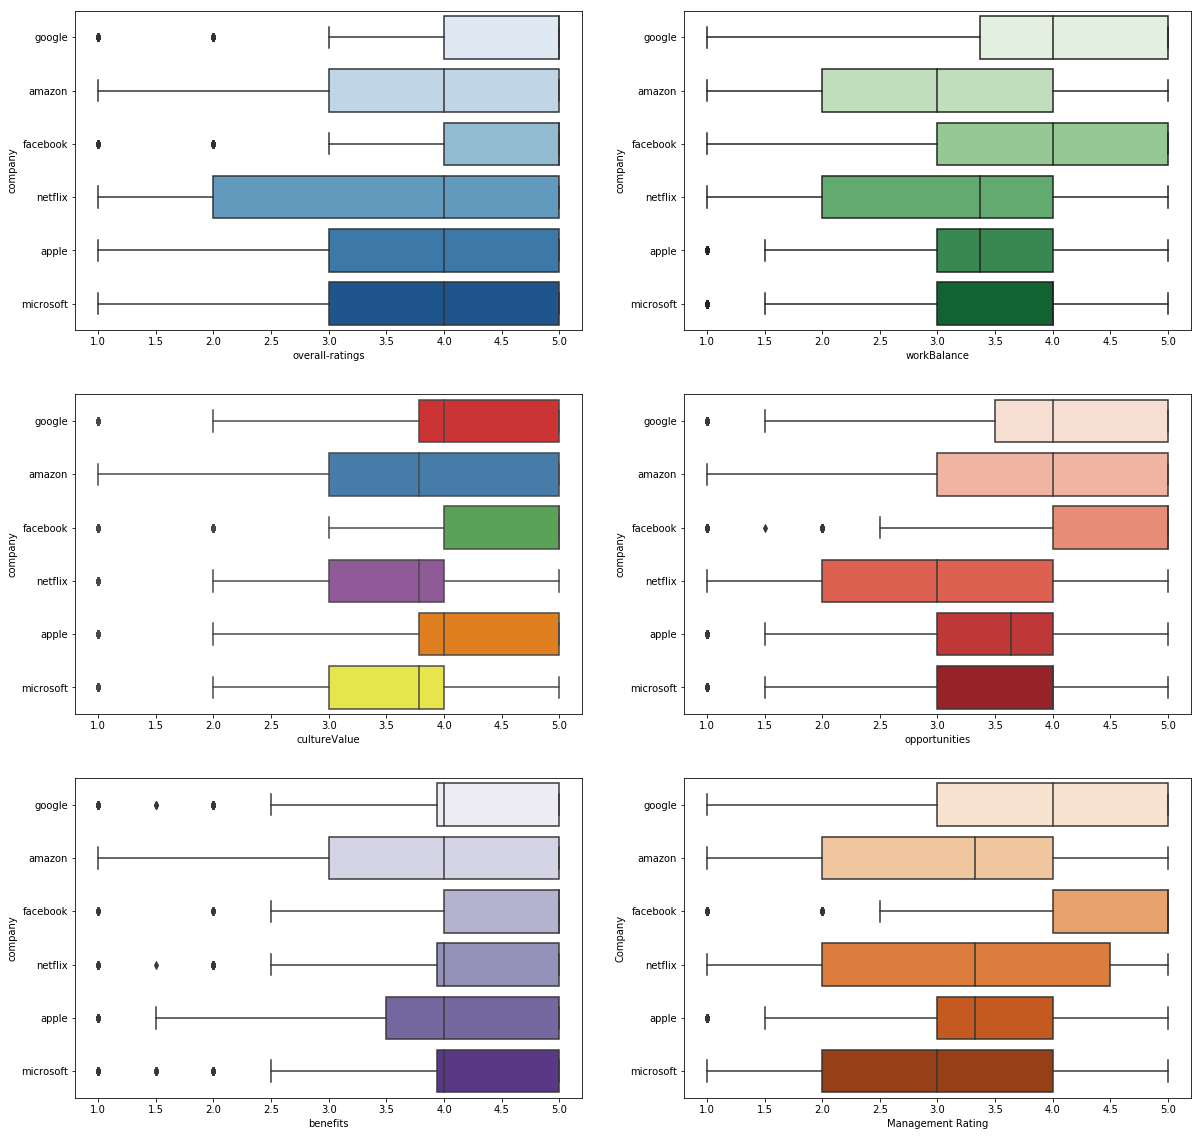

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

f, axes = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))

sns.boxplot(x="overall-ratings", y="company", data=data, palette="Blues", ax = axes[0, 0])
plt.xlabel('Overall Rating')
plt.ylabel('Company')

sns.boxplot(x="workBalance", y="company", data=data, palette="Greens", ax = axes[0, 1])
plt.xlabel('Work Balance Rating')
plt.ylabel('Company')

sns.boxplot(x="cultureValue", y="company", data=data, palette="Set1", ax = axes[1, 0])
plt.xlabel('Culture Value Rating')
plt.ylabel('Company')

sns.boxplot(x="opportunities", y="company", data=data, palette="Reds", ax = axes[1, 1])
plt.xlabel('Career Opportunities Rating')
plt.ylabel('Company')

sns.boxplot(x="benefits", y="company", data=data, palette="Purples", ax = axes[2, 0])
plt.xlabel('Company Benefits Rating')
plt.ylabel('Company')

sns.boxplot(x="management", y="company", data=data, palette="Oranges", ax = axes[2, 1])
plt.xlabel('Management Rating')
plt.ylabel('Company')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


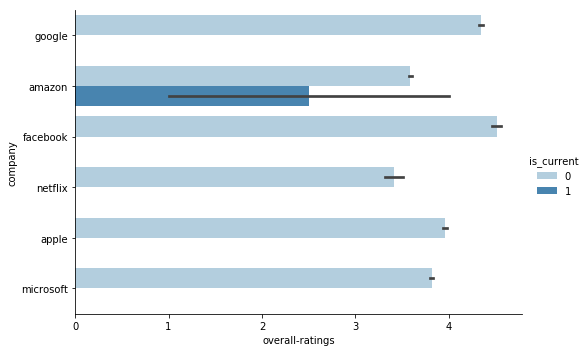

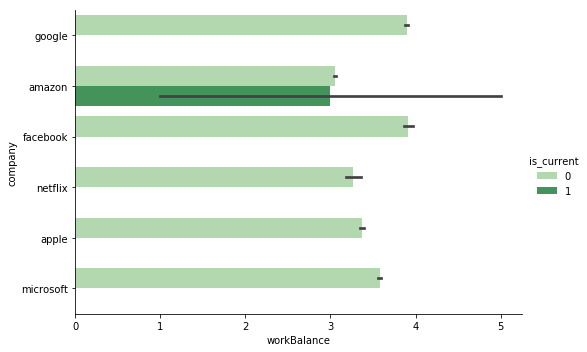

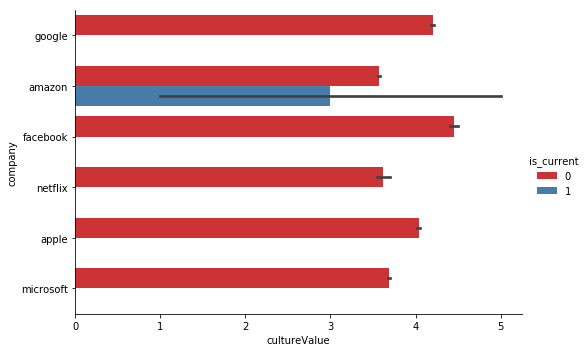

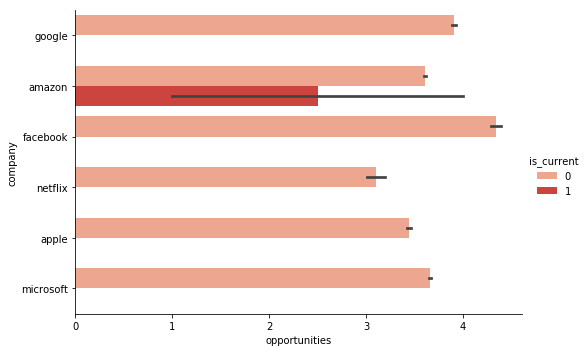

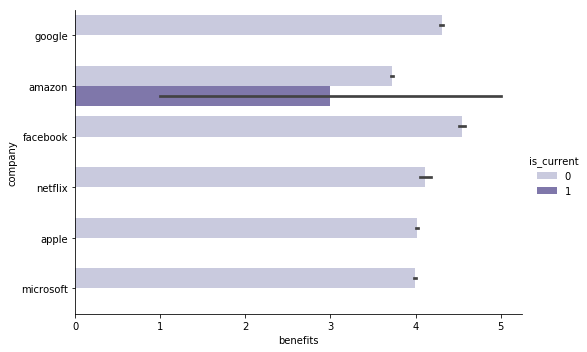

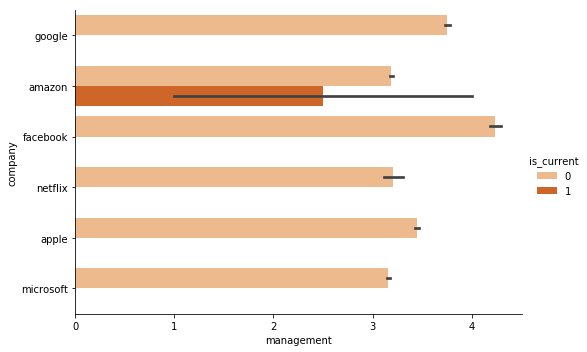

In [4]:
sns.catplot(x='overall-ratings', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Blues")

sns.catplot(x='workBalance', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Greens")

sns.catplot(x='cultureValue', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Set1")

sns.catplot(x='opportunities', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Reds")

sns.catplot(x='benefits', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Purples")

sns.catplot(x='management', y= 'company', hue= 'is_current', 
            data = data, kind ='bar', aspect=1.5, palette="Oranges")
